<a href="https://colab.research.google.com/github/FahmidaMitu/FahmidaMitu-Bangla-Toxic-Language-Analysis-using-Machine-Learning-Approaches/blob/main/Bangla_Toxic_Language_Analysis_using_Machine_Learning_Approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bltk
!pip install bnltk
!pip install bnlp_toolkit
!pip install glove_python-binary
!pip install BnVec
!pip install transformers
!pip install python-Levenshtein #by RABBI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.4 MB 646 kB/s 
  Created wheel for bltk: filename=bltk-1.2-py3-none-any.whl size=17432539 sha256=2feaf17ef93ea873fdfe90fdedac55fbde68aba881f5da8d983ce4424d1af52d
  Stored in directory: /root/.cache/pip/wheels/0b/4f/91/e074e661b4dcbc24a83e050d1c75cecfa186ffe9d58b641c51
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=b311b9d6cf044eda6b4b50c92427d54fa8606b3123bd5d4744aa84799248303c
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built bltk sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.5 MB/s 
     |████████████████████████████████| 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import itertools
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import re
from bnlp.corpus import stopwords, punctuations, letters, digits
from bnltk.tokenize import Tokenizers 
# from bltk.langtools import UgraStemmer
# from bnltk.tokenize import Tokenizers  
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer



punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# df = pd.read_excel('/content/drive/MyDrive/MITU-DATASET/ToxLex_bn output v1 29 January 2022 (1).xlsx')   # rimi
df = pd.read_excel('/content/drive/MyDrive/Cse498/ToxLex_bn output v1 29 January 2022 (1).xlsx')  # mitu

df.head(152)

,ID,Base_bigram,Meaning_(Approx.),Transcription_(IPA),Themetic_category,Token_Occerance,Unusual_ Spelling,Degree_of_toxicity
0,1,অক্ষম পুরুষের,Impotent men,əkʂəmə puɾuʂeːɾə,Sexist & Patriarchic bully,38,No,Mid
1,2,অডিও সেক্স,Audio sex,əɖɪoː s̪eːks̪ə,Sexist & Patriarchic bully,45,No,Mid
2,3,অনৈসলামিক কাজ,Non-Islamic work,ən̪əɪs̪əlɑːmɪkə kɑːd͡ʒə,Religion/ communal hate-words,13,No,Mid
3,4,অন্ডকোষ কাটলেই,Cutting scrotum,ən̪ɖəkoːʂə kɑːʈəleːɪ,Sexist & Patriarchic bully,7,No,Mid
4,5,অন্ডকোষ হীন,Scrotumless,ən̪ɖəkoːʂə ɦiːn̪ə,Sexist & Patriarchic bully,6,No,Mid
...,...,...,...,...,...,...,...,...
147,148,কসাই মো*কে,Butcher mo * k,kəs̪ɑːɪ moː*keː,Political hate-words,136,No,Mid
148,149,কসাই মো*র,Butcher Mo * r,kəs̪ɑːɪ moː*ɾə,Political hate-words,221,No,Mid
149,150,কসাই মো*,Butcher mo *,kəs̪ɑːɪ moː*,Political hate-words,113,No,Mid
150,151,কসাই মো*র,Butcher Mo * r,kəs̪ɑːɪ moː*ɾə,Political hate-words,64,No,Mid


In [ ]:
df1=df 
df.shape  #rows, cols

(1959, 8)

In [ ]:
df1.head(150)

,ID,Base_bigram,Meaning_(Approx.),Transcription_(IPA),Themetic_category,Token_Occerance,Unusual_ Spelling,Degree_of_toxicity
0,1,অক্ষম পুরুষের,Impotent men,əkʂəmə puɾuʂeːɾə,Sexist & Patriarchic bully,38,No,Mid
1,2,অডিও সেক্স,Audio sex,əɖɪoː s̪eːks̪ə,Sexist & Patriarchic bully,45,No,Mid
2,3,অনৈসলামিক কাজ,Non-Islamic work,ən̪əɪs̪əlɑːmɪkə kɑːd͡ʒə,Religion/ communal hate-words,13,No,Mid
3,4,অন্ডকোষ কাটলেই,Cutting scrotum,ən̪ɖəkoːʂə kɑːʈəleːɪ,Sexist & Patriarchic bully,7,No,Mid
4,5,অন্ডকোষ হীন,Scrotumless,ən̪ɖəkoːʂə ɦiːn̪ə,Sexist & Patriarchic bully,6,No,Mid
...,...,...,...,...,...,...,...,...
145,146,কসাই মু*র,Butcher Mu * r,kəs̪ɑːɪ mu*ɾə,Political hate-words,89,No,Mid
146,147,কসাই মো*,Butcher mo *,kəs̪ɑːɪ moː*,Political hate-words,339,No,Mid
147,148,কসাই মো*কে,Butcher mo * k,kəs̪ɑːɪ moː*keː,Political hate-words,136,No,Mid
148,149,কসাই মো*র,Butcher Mo * r,kəs̪ɑːɪ moː*ɾə,Political hate-words,221,No,Mid


In [ ]:
df.columns

Index(['ID', 'Base_bigram', 'Meaning_(Approx.)', 'Transcription_(IPA)',
       'Themetic_category', 'Token_Occerance', 'Unusual_ Spelling ',
       'Degree_of_toxicity'],
      dtype='object')

In [ ]:
df.drop(columns=['ID', 'Meaning_(Approx.)', 'Transcription_(IPA)',
       'Themetic_category', 'Token_Occerance', 'Unusual_ Spelling '])

,Base_bigram,Degree_of_toxicity
0,অক্ষম পুরুষের,Mid
1,অডিও সেক্স,Mid
2,অনৈসলামিক কাজ,Mid
3,অন্ডকোষ কাটলেই,Mid
4,অন্ডকোষ হীন,Mid
...,...,...
1954,হোগায় অনেক,Extreme
1955,হোগায় কারেন্ট,Extreme
1956,হোগায় লাথি,Extreme
1957,হোগার মধ্যে,Extreme


In [ ]:
df['Degree_of_toxicity'].value_counts()

Mid        1350
Extreme     314
High        295
Name: Degree_of_toxicity, dtype: int64

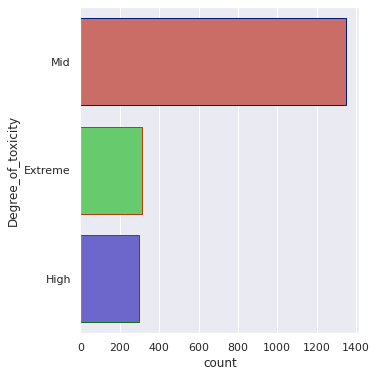

In [ ]:
# distribution of classes for prediction
plt.figure(figsize= (5,6))
sb.set_theme(style="darkgrid")
sb.countplot(y="Degree_of_toxicity", data=df, palette='hls', edgecolor=sb.color_palette("dark", 50))

In [ ]:
# Missing value check
df['Base_bigram'].isnull().sum()

0

In [ ]:
# Duplicate value check
df['Base_bigram'].duplicated().sum()

3

In [ ]:
df['Base_bigram'].drop_duplicates().shape 

(1956,)

In [ ]:
corpus = df['Base_bigram']
corpus[0]

'অক্ষম পুরুষের'



# **PREPROCESSING**



In [ ]:
whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
# digit = u"[০১২৩৪৫৬৭৮৯]+"
# bangla_fullstop = u"\u0964"
punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
token = []
all_corpus =[]
doc_tokenized = []

for word in range(len(corpus)):
  token= whitespace.sub(" ",corpus[word]).strip()
  token = re.sub(punctSeq, " ", token)
  #token = re.sub(digit, " ", token)
  # token = re.sub(bangla_fullstop, " ",token)  ##Remove bangla fullstop
  token = re.sub(punc, " ", token)   ##Remove Punctuation
  # token = remove_stopwords(token, stopwords)  ##Remove stopwords using bnlp tool
  token = word_tokenize(token)
  # token = stemmer.stem(token)     ##Stemming Data using bltk tool
  # doc_tokenized.append(token)  ##Tokenized data
  token = ' '.join(token)
  all_corpus.append(token)
all_corpus[:10]

['অক্ষম পুরুষের',
 'অডিও সেক্স',
 'অনৈসলামিক কাজ',
 'অন্ডকোষ কাটলেই',
 'অন্ডকোষ হীন',
 'অবৈধ জালিম',
 'অবৈধ পোলা',
 'অবৈধ প্রেম',
 'অবৈধ ফসল',
 'অবৈধ সন্তান']

In [ ]:
all_corpus[150]

'কসাই মো র'

**FEATURE** **EXTRACTION** 

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
from BnVec import CountVectorizer # for Bangla
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_corpus)
X.shape

(1959, 1644)

In [ ]:
# make training and test sets
from sklearn.model_selection import train_test_split
y = df.Degree_of_toxicity
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(all_corpus, y, test_size=0.20) # random_state=42

In [ ]:
# Fit and transform the training data
count_train = vectorizer.fit_transform(X_train)

# transform the test set
count_test = vectorizer.transform(X_test)

In [ ]:
print(count_train.shape)

(1567, 1425)


## **DTR**

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# nbc_count = MultinomialNB()
# nbc_count.fit(count_train, Y_train)

from sklearn.tree import DecisionTreeClassifier

dtc_count  = DecisionTreeClassifier()
dtc_count.fit(count_train, Y_train)

DecisionTreeClassifier()

In [ ]:
score = dtc_count.score(count_test, Y_test)
print(f'Accuracy: {round(score*100,2)}%')        

Accuracy: 84.18%


In [ ]:
dtc_pred_count = dtc_count.predict(count_test)
dtc_cm = confusion_matrix(Y_test, dtc_pred_count, labels=['Mid','Extreme','Extreme'])
print(dtc_cm)

[[249   0   5]
 [  0   0   0]
 [ 20   0  38]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


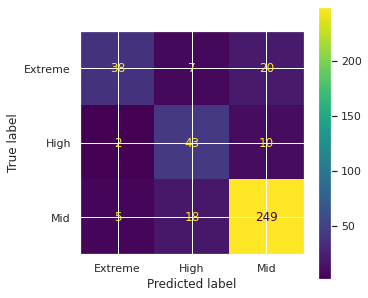

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dtc_count, count_test, Y_test, ax=ax)  
plt.show() 

In [ ]:
from sklearn.metrics import classification_report

dtc_pred_count = dtc_count.predict(count_test)
print(classification_report(Y_test, dtc_pred_count))

              precision    recall  f1-score   support

     Extreme       0.84      0.58      0.69        65
        High       0.63      0.78      0.70        55
         Mid       0.89      0.92      0.90       272

    accuracy                           0.84       392
   macro avg       0.79      0.76      0.76       392
weighted avg       0.85      0.84      0.84       392



# **LR**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
LR_count = LogisticRegression()
LR_count.fit(count_train, Y_train)

LogisticRegression()

In [ ]:
score = LR_count.score(count_test, Y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 82.14%


In [ ]:
LR_pred_count = LR_count.predict(count_test)
LR_cm = confusion_matrix(Y_test, LR_pred_count, labels=['Mid','Extreme','Extreme'])
print(LR_cm)

[[259   0   3]
 [  0   0   0]
 [ 32   0  27]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


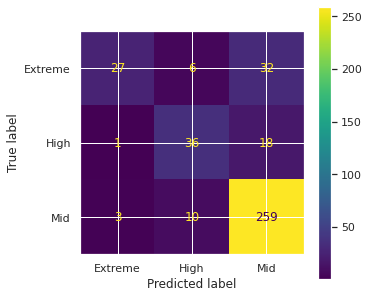

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(LR_count, count_test, Y_test, ax=ax)  
plt.show() 

In [ ]:
LR_pred_count = LR_count.predict(count_test)
print(classification_report(Y_test, LR_pred_count))

              precision    recall  f1-score   support

     Extreme       0.87      0.42      0.56        65
        High       0.69      0.65      0.67        55
         Mid       0.84      0.95      0.89       272

    accuracy                           0.82       392
   macro avg       0.80      0.67      0.71       392
weighted avg       0.82      0.82      0.81       392



# **SVM**

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC(C=1.0, kernel='linear', gamma='scale')
svc.fit(count_train, Y_train)

SVC(kernel='linear')

In [ ]:
score = svc.score(count_test, Y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.97%


In [ ]:
svc_pred_count = svc.predict(count_test)
svc_cm = confusion_matrix(Y_test, svc_pred_count, labels=['Mid','Extreme','Extreme'])
print(svc_cm)

[[253   0   3]
 [  0   0   0]
 [ 17   0  42]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


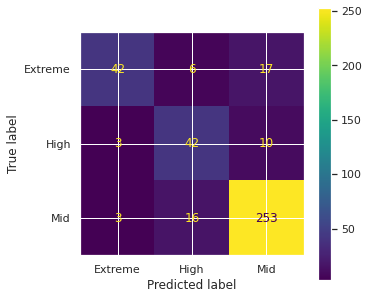

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(svc, count_test, Y_test, ax=ax)  
plt.show() 

In [ ]:
svc_pred_count = svc.predict(count_test)
print(classification_report(Y_test, svc_pred_count))

              precision    recall  f1-score   support

     Extreme       0.88      0.65      0.74        65
        High       0.66      0.76      0.71        55
         Mid       0.90      0.93      0.92       272

    accuracy                           0.86       392
   macro avg       0.81      0.78      0.79       392
weighted avg       0.86      0.86      0.86       392



# **NB**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
nbc_count = MultinomialNB()
nbc_count.fit(count_train, Y_train)

MultinomialNB()

In [ ]:
score = nbc_count.score(count_test, Y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.2%


In [ ]:
nbc_pred_count = nbc_count.predict(count_test)
nbc_cm = confusion_matrix(Y_test, nbc_pred_count, labels=['Mid','Extreme','Extreme'])
print(nbc_cm)

[[260   0   2]
 [  0   0   0]
 [ 25   0  35]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


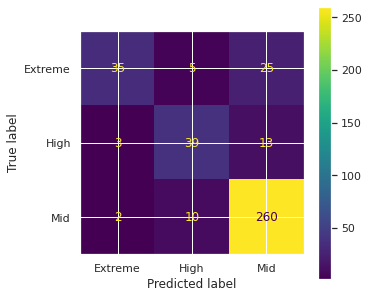

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(nbc_count, count_test, Y_test, ax=ax)  
plt.show() 

In [ ]:
nbc_pred_count = nbc_count.predict(count_test)
print(classification_report(Y_test, nbc_pred_count))

              precision    recall  f1-score   support

     Extreme       0.88      0.54      0.67        65
        High       0.72      0.71      0.72        55
         Mid       0.87      0.96      0.91       272

    accuracy                           0.85       392
   macro avg       0.82      0.73      0.76       392
weighted avg       0.85      0.85      0.84       392



# **RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_count = RandomForestClassifier()
rf_count.fit(count_train, Y_train)

RandomForestClassifier()

In [ ]:
score = rf_count.score(count_test, Y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 83.93%


In [ ]:
rf_pred_count = rf_count.predict(count_test)
rf_cm = confusion_matrix(Y_test, rf_pred_count, labels=['Mid','Extreme','Extreme'])
print(rf_cm)

[[255   0   4]
 [  0   0   0]
 [ 26   0  32]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


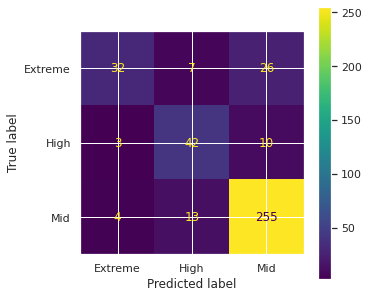

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf_count, count_test, Y_test, ax=ax)  
plt.show() 

In [ ]:
rf_pred_count = rf_count.predict(count_test)
print(classification_report(Y_test, rf_pred_count))

              precision    recall  f1-score   support

     Extreme       0.82      0.49      0.62        65
        High       0.68      0.76      0.72        55
         Mid       0.88      0.94      0.91       272

    accuracy                           0.84       392
   macro avg       0.79      0.73      0.75       392
weighted avg       0.84      0.84      0.83       392



# **Lasso**

In [ ]:
# from sklearn import linear_model
# lasso_count = linear_model.Lasso()
# lasso_count.fit(count_train, Y_train)

ValueError: ignored

# **Sk-learn countVectorizer**

**1.   DTR => 68.86%** 

**2.   LR => 71.17%**

**3.   SVM => 71.68%**

**4.   NB => 70.41%**

**5.   RF => 70.66%**








---





# **BnVec countVectorizer (for Bangla)**

**1.   DTR => 86.73%** 

**2.   LR => 84.95%**

**3.   SVM => 88.01%**

**4.   NB =>86.73%**

**5.   RF => 87.5%**
